In [1]:
# import data
from tensorflow.keras.datasets import boston_housing 
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [2]:

#normalize data for NN ! 
mean = train_data.mean(axis=0) 
train_data -= mean
std = train_data.std(axis=0) 
train_data /= std
test_data -= mean 
test_data /= std

In [9]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np 
from keras import models 
from keras import layers 

#define network: not too complicated, as we don't have a lot of data
#needs to be fine-tuned for the model
def build_model():
    model = models.Sequential() 
    model.add(layers.Dense(32, activation='relu',input_shape=(train_data.shape[1],)))         
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 
    return  model

In [ ]:
#DO NOT RUN, implement cross-validation: naive
num_epochs = 50 
model = build_model()

num_val_samples = len(train_data) // 4
val_data = train_data[:num_val_samples]
val_targets = train_targets[:num_val_samples]
partial_train_data = train_data[num_val_samples:] 
partial_train_targets = train_targets[num_val_samples:]
history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=10, verbose=0)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


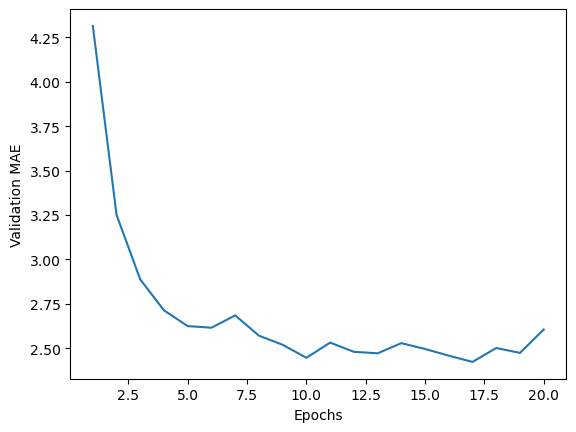

In [15]:

#Cross-validation

#Parameters, to fine-tune
k=4
num_val_samples = len(train_data) // k 
num_epochs = 20

all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0) 
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model() 
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0) #information during the fit
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1),average_mae_history) 
plt.xlabel('Epochs')
plt.ylabel('Validation MAE') 
plt.show()


In [22]:
#once we have finished the fine tuning
model = build_model()
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 17.4368 - mae: 2.5968
